# GRIP: The Spark Foundation

## Data Science and Business Analytics Intern

## Author : Novil Sai Kumar Ayencha

## Task 1 : Prediction using Supervised ML
#### Predict the percentage of a student based on the no of study hours.

In [1]:
# the task has two variables where the feature is the no of hours studied and
# the target is the percentage score. This can be solved using simple linear regression.

In [2]:
# first we split the task into following sub tasks
#  1. Reading data
#  2. Preprocessing the data
#  3. Building and Training the Model
#  4. Making Predictions
#  5. Evaluating the Model

## 1. Reading Data

In [3]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = 'http://bit.ly/w-data'
df = pd.read_csv(data)

In [5]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## 2.Preprocessing

In [6]:
# Exploring data
# data cleaning and dealing with missing values
# data visualizing

#### Exploring data

In [7]:
df.shape

(25, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [9]:
# we can see that there are no null or nan values in the data
# which means there are no missing values in the data
# so data is ready for the further process

In [10]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
# here we can observe that the mean and median(50%) for both Hours and Scores 
# are very close.
# Which means there are no outliers in our data.

#### Data visualization

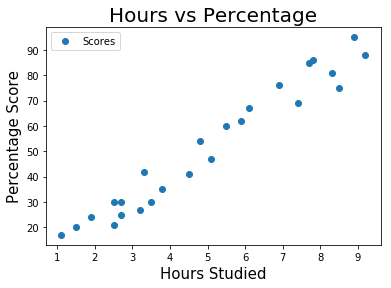

In [12]:
# ploting the distribution of scores
df.plot(x = 'Hours', y = 'Scores', style = 'o')
plt.title('Hours vs Percentage', fontsize = 20)
plt.xlabel('Hours Studied', fontsize = 15)
plt.ylabel('Percentage Score', fontsize = 15)
plt.show()

In [13]:
# from the above plot we can expect that there exist a linear relationship
# between Score and Hours

In [14]:
df.corr(method = 'pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [15]:
# based the correlation we can understand that there exist a linear relation.

## 3. Building and Training Model

In [16]:
# splitting data
# fitting a linear model and training the model
# Checking accuracy 
# plotting the line of regression

#### Splitting the data

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
hrs = df.iloc[:, :-1].values
scr = df.iloc[:, 1].values

In [19]:
hrs[:5], scr[:5]

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5]]),
 array([21, 47, 27, 75, 30], dtype=int64))

In [20]:
hrs_tr, hrs_ts, scr_tr, scr_ts = train_test_split(hrs, scr, test_size = 0.2, random_state = 0)


In [21]:
hrs_tr.shape, hrs_ts.shape

((20, 1), (5, 1))

In [22]:
scr_tr.shape, scr_ts.shape

((20,), (5,))

#### Fitting a linear model

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
linearRegressor = LinearRegression()
linearRegressor.fit(hrs_tr, scr_tr)
#scr_predict = linearRegressor.predict(hrs_tr)

LinearRegression()

In [25]:
regressor = LinearRegression()
regressor.fit(hrs_tr, scr_tr)

LinearRegression()

#### Ploting the regression line

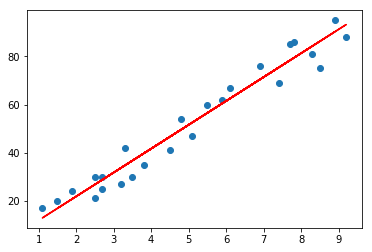

In [26]:
line = regressor.coef_ * hrs + regressor.intercept_

# plotting for the test data
plt.scatter(hrs, scr)
plt.plot(hrs, line, color = 'red')
plt.show()

#### Checking the accuracy scores for traing and test set

In [27]:
print('Test Score')
print(regressor.score(hrs_ts, scr_ts))
print('Traing Score')
print(regressor.score(hrs_ts, scr_ts))

Test Score
0.9454906892105355
Traing Score
0.9454906892105355


## 4. Making Predictions

In [28]:
# testing Data
print(hrs_ts)
# model prediction

scr_predict = regressor.predict(hrs_ts)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [29]:
# comparing Actual vs Predicted
df1 = pd.DataFrame({'Actual': scr_ts, 'Predicted':scr_predict})
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [30]:
# lets predict the score for some new data 
print('Score of student who studied for 9 hrs', regressor.predict([[9]]))
print('Score of student who studied for 9 hrs', regressor.predict([[9.5]]))
print('Score of student who studied for 9 hrs', regressor.predict([[6.9]]))

Score of student who studied for 9 hrs [91.21406837]
Score of student who studied for 9 hrs [96.16939661]
Score of student who studied for 9 hrs [70.40168976]


## 5. Model Evaluation Metrics

In [32]:
# Checking the efficiency of model

from sklearn import metrics 

mean_sq_er = mtr.mean_squared_error(scr_ts, scr_predict)
mean_abs_er = mtr.mean_absolute_error(scr_ts, scr_predict)

print('Mean Squred Error:', mean_sq_er)
print('Mean absolute Error: ', mean_abs_er)
print('Root mean squared error: ', np.sqrt(mean_sq_er))
print('R-2 : ', metrics.r2_score(scr_ts, scr_predict))

Mean Squred Error: 21.598769307217413
Mean absolute Error:  4.18385989900298
Root mean squared error:  4.647447612100368
R-2 :  0.9454906892105355
